# Basic example of NN of the GANN library

This example shows how to use create a basic neural network using module NN of GANN library.

COPYRIGHT (C) 2023 Gabriel Rojas (Gavit0) - turing.ia.ihc@gmail.com . All Rights Reserved.

## Installing

The following commands will install the python packages needed to use GANN and evaluate the results.

There are two options (choose just one):
* Install libraries in the environment. (Recomended)
* Using the local git repository

In [1]:
# Option 1: from git
#! pip install git+https://github.com/Turing-IA-IHC/gann.git

In [2]:
# Option 2: Uncomment this lines and comment the previous line to use local version
import sys
sys.path.insert(0, "../../gann")

## Imports

In [3]:
#@title general imports
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import time

In [4]:
#@title gann params
from gann import Params as gann_params
gann_params.activate_gpu_mode() # Try to use cupy if available

GPU mode activated.


In [5]:
#@title gann imports
from gann.ga import Individual, Darwin_G0
from gann.nn import Net
from gann.nn.layers import Dense
from gann.nn.listeners import Keep_Progress, TwoDimensional_Graph

## Data of test

In [6]:
#@title Initial data
np.random.seed(42)
n = 500
clases = 2
X, Y = make_circles(n_samples=n, factor=0.4, noise=0.1)
Y = Y[:,np.newaxis]

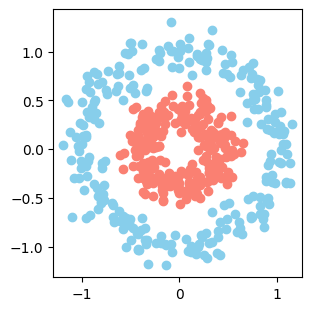

In [7]:
#@title Plot the data of test
fig, ax = plt.subplots(figsize=(3, 3), layout='constrained')
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='salmon')
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='skyblue')
plt.axis('equal')
plt.show()

## New basic NN

In [8]:
#@title Create the net
best_model = Net(loss_func='mse', 
  layers=[
      Dense(8, 'Sigmoid'), 
      Dense(4, 'Sigmoid'), 
      Dense(1, 'Sigmoid')], 
  listener=Keep_Progress())
best_model.compile(clases)

In [9]:
#@title Train the net
best_model.train(X, Y, 2000)

Training (MSE  :0.024): 100%|██████████| 2000/2000 [00:40<00:00, 49.54it/s]


Inputs: 2    Outputs: 1    lr: 0.021523360500000012  loss (MSE): 0.024  Params: 55

 Layer : Type     | in  : out : Act func  : Params
   0   : Dense    |  2  :  8  : Sigmoid   : 17        
   1   : Dense    |  8  :  4  : Sigmoid   : 33        
   2   : Dense    |  4  :  1  : Sigmoid   : 5         



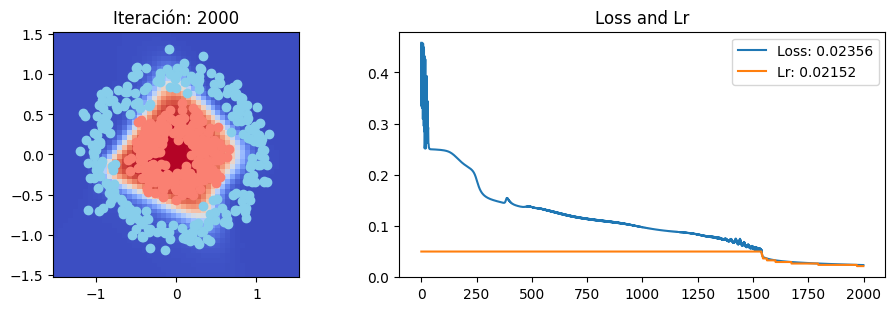

In [10]:
#@title Plot results
best_model.info()
tdg = TwoDimensional_Graph(X,Y, best_model)
for i in zip(best_model.listener.losses, best_model.listener.lrs):
  tdg.append_data(i[0], i[1])
tdg.show()